<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-colabs/blob/main/Testes_de_Hipo%CC%81tese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TESTE DE HIPÓTESES EM PYTHON

Bootcamp data analytics Womakerscode

O objetivo deste notebook é auxiliar o entendimento em como realizar testes: Qui Quadrado, ANOVA, KS e QQ Plots, conteudos abordados nas aulas do bootcamp

In [ ]:
#### importando os pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## TESTE QUI-QUADRADO PARA ASSOCIAÇÕES DE VARIÁVEIS CATEGÓRICAS

In [ ]:
from tabulate import tabulate ## para fazer tabelas

### gerando uma tabela t como exmeplo de visualizacao
t = [['Male', 'Car'],
         ['Male', 'Car'],
         ['Male', 'Motorcycle'],
         ['Female', 'Car'],
         ['Female', 'Bike']]

### exemplo da funcao tabulate
print(tabulate(t, headers= ['Gender','Vehicle'],
               tablefmt = 'fancy_grid',
               stralign='center',
               numalign='center',
               floatfmt=".2f"))

╒══════════╤════════════╕
│  Gender  │  Vehicle   │
╞══════════╪════════════╡
│   Male   │    Car     │
├──────────┼────────────┤
│   Male   │    Car     │
├──────────┼────────────┤
│   Male   │ Motorcycle │
├──────────┼────────────┤
│  Female  │    Car     │
├──────────┼────────────┤
│  Female  │    Bike    │
╘══════════╧════════════╛


### 1. Criando a tabela de contingencia

In [ ]:
#### criando uma tabela de contingencia como exmeplo
print(tabulate([['Male',9,18,28], ['Female',5,8,15]],
               headers = ['Car', 'Motorcycle', 'Bike'],
               tablefmt = 'fancy_grid',stralign='center',
               numalign='center',
               floatfmt=".2f"))

╒════════╤═══════╤══════════════╤════════╕
│        │  Car  │  Motorcycle  │  Bike  │
╞════════╪═══════╪══════════════╪════════╡
│  Male  │   9   │      18      │   28   │
├────────┼───────┼──────────────┼────────┤
│ Female │   5   │      8       │   15   │
╘════════╧═══════╧══════════════╧════════╛


<Axes: >

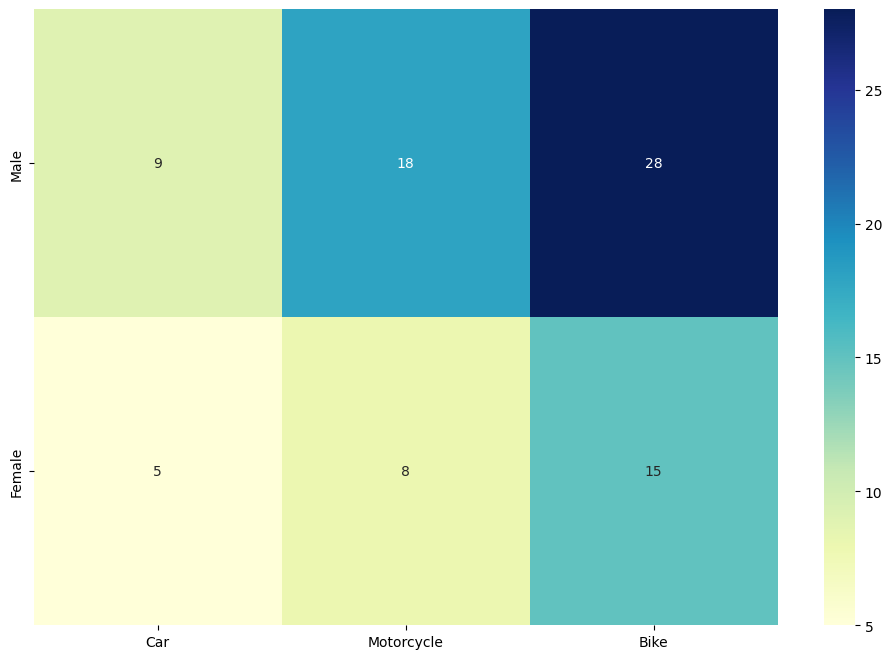

In [ ]:
#plot da tabela com cores
table = [[9, 18, 28],
         [5,  8,  15]]
plt.figure(figsize=(12,8))
x_axis_labels = ['Car', 'Motorcycle','Bike']
y_axis_labels = ['Male', 'Female']
sns.heatmap(table, annot=True, cmap="YlGnBu",xticklabels=x_axis_labels, yticklabels=y_axis_labels)

### 2. Formulando as hipóteses

H0 : As variaveis nao tem grau de associacao
HA : As variáveis possuem grau de associação.

Nivel de significancia, alpha = 0.05 (5%).

###3. RODANDO O TESTE

In [ ]:
# vamos rodar o teste utilizando a função chi2_contingency() do pacote SciPy
from scipy.stats import chi2_contingency
from scipy.stats import chi2

estatistica, pvalor, df, expected = chi2_contingency(table)

alpha = 0.05

print(pvalor)
if pvalor <= alpha:
    print('Dependentes (rejeita H0)')
else:
    print('Independentes (nao rejeita H0)')

0.9267147440706386
Independentes (nao rejeita H0)


## TESTE ANOVA

Vamos realizar um teste ANOVA para média de idade de diferentes regioes de clientes de determinada rede de farmácias

In [ ]:
### GERANDO OS DADOS
import scipy.stats as stats

np.random.seed(12)

regioes =   ["sul","sudeste","centro_oeste","norte","nordeste"]

# gerando dados aleatorios com python
consum_reg = np.random.choice(a= regioes,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

consum_idade = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

In [ ]:
# agrupando os dados por regiao
consum_frame = pd.DataFrame({"reg":consum_reg,"idade":consum_idade})
groupos = consum_frame.groupby("reg").groups

# extraindo a idade de cada um dos grupos
sul = consum_idade[groupos["sul"]]
sudeste = consum_idade[groupos["sudeste"]]
centro_oeste = consum_idade[groupos["centro_oeste"]]
norte = consum_idade[groupos["norte"]]
nordeste = consum_idade[groupos["nordeste"]]

# Perform the ANOVA
stats.f_oneway(sul, sudeste, centro_oeste, norte, nordeste)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [ ]:
consum_frame

,reg,idade
0,sudeste,51
1,nordeste,49
2,centro_oeste,51
3,nordeste,48
4,sul,56
...,...,...
995,nordeste,47
996,sul,40
997,nordeste,50
998,nordeste,51


Como o hipotese nula do teste é de que nao ha diferenca entre os grupos,
como o p-valor é maior que 0.05 nao podemos rejeitar H0, e entao nao há diferenca entre os grupos estatisticamente diferente

## TESTE KS

<ipython-input-10-bd67540a65d6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rvs).set_title("Exemplo: Distribuiçao Normal")


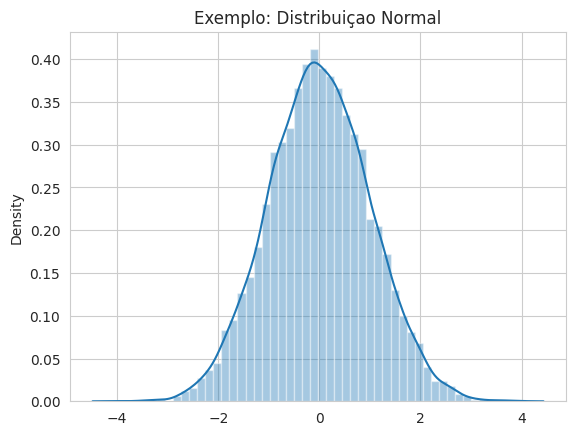

In [ ]:
# Generando 10000 pontos de uma distribuicao normal
rvs = stats.norm.rvs(size=10000)
sns.set_style('whitegrid')
# sns.kdeplot(rvs)
sns.distplot(rvs).set_title("Exemplo: Distribuiçao Normal")
plt.show()

Rodando um teste KS para comparar os dados gerados com uma distribuição normal com o teste KS

In [ ]:
stats.kstest(rvs=rvs, cdf='norm')

KstestResult(statistic=0.005428053253586029, pvalue=0.9282715152505315, statistic_location=-0.10453613535027459, statistic_sign=1)

A hipótese nula do teste é de que a distribuição dos dados segue a mesma da distribuição de referencia.

Sendo assim como o pvalor é maior que 0.05, temos para um nivel de significancia de 5%, nao podemos rejeitar a hipotese nula

### Vamos rodar o mesmo teste agora para a variável idade gerada com a distribuicao de poisson no teste anterior

<ipython-input-43-082d4e08e3f7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consum_idade).set_title("Exemplo: Distribuiçao idade, poisson")


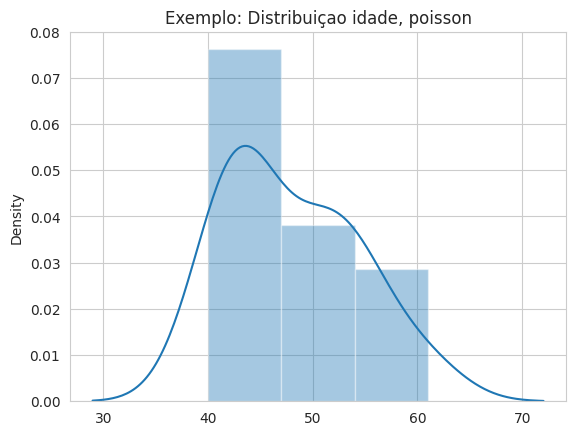

In [ ]:
### gerando a variavel idade com a distribuicao de poisson
consum_idade = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=15)
sns.distplot(consum_idade).set_title("Exemplo: Distribuiçao idade, poisson")
plt.show()

In [ ]:
### roda o teste ks
stats.kstest(rvs=consum_idade, cdf='norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=40, statistic_sign=-1)

 hipótese nula do teste é de que a distribuição dos dados segue a mesma da distribuição de referencia.

Sendo assim como o pvalor é menor que 0.05, temos para um nivel de significancia de 5%, rejeitamos a hipotese nula, e o dado nao segue a distribuicao normal pelo teste

### QQ PLOTS

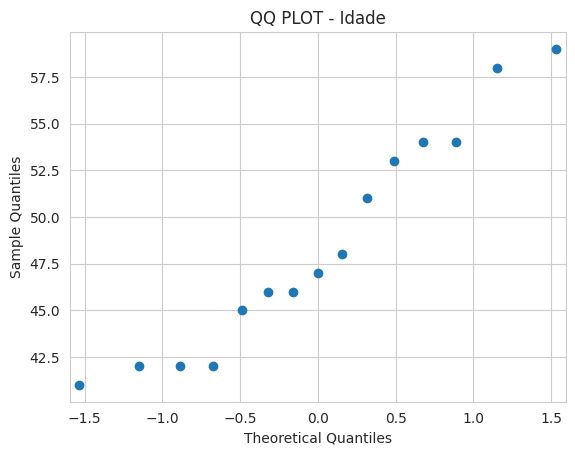

In [ ]:
import statsmodels.api as sm

sm.qqplot(consum_idade)
plt.title("QQ PLOT - Idade")
plt.show()

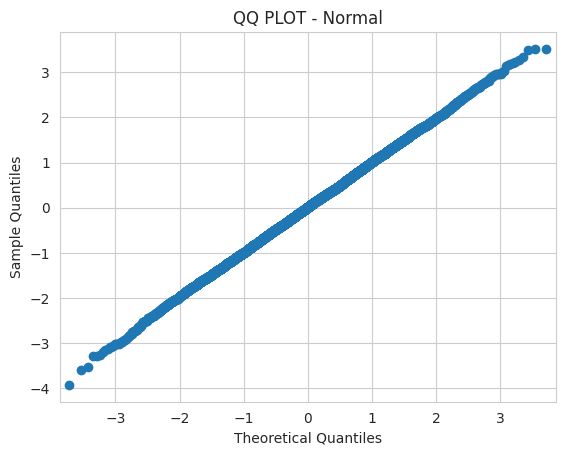

In [ ]:
sm.qqplot(rvs)
plt.title("QQ PLOT - Normal")
plt.show()